# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Create New Variables

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check matplolib version
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'C:\Users\shyro\OneDrive\Documents\2. Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\King County House Sales'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_revised.csv'))

### 2. Data Cleaning

In [6]:
df.shape

(21599, 21)

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

#### Missing Values Check:

In [10]:
# Check for missing values

df.isnull().sum() #No missing values.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Duplicates Check:

In [11]:
# Find duplicates

df_dups = df[df.duplicated()]

In [12]:
df_dups.shape # No duplicates!

(0, 21)

#### Mixed-Type Data:

In [13]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

        # No mixed-type columns either!

### 3. Exploring Relationships

### Correlations:

In [14]:
# Create a correlation matrix using pandas

df.corr()

C:\Users\shyro\AppData\Local\Temp\ipykernel_11708\1125721538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016739  0.002513   0.005338    -0.012149 -0.131933   
price         -0.016739  1.000000  0.316052   0.525884     0.701930  0.089825   
bedrooms       0.002513  0.316052  1.000000   0.528342     0.593362  0.033451   
bathrooms      0.005338  0.525884  0.528342   1.000000     0.755825  0.088180   
sqft_living   -0.012149  0.701930  0.593362   0.755825     1.000000  0.173338   
sqft_lot      -0.131933  0.089825  0.033451   0.088180     0.173338  1.000000   
floors         0.018639  0.256883  0.183942   0.502631     0.354059 -0.004870   
waterfront    -0.002724  0.266395 -0.006834   0.063742     0.103854  0.021626   
view           0.011547  0.397384  0.082508   0.188397     0.284721  0.074880   
condition     -0.023807  0.036126  0.023655  -0.126119    -0.059236 -0.008839   
grade          0.008204  0.667806  0.366761   0.666076     0.762704  0.114468   
sqft_above    -0.010737  0.605419  0.492742   0.686738     0.876483  0.184038   
sqft_basement -0.005123  0.323834  0.309344   0.283553     0.435208  0.015390   
yr_built       0.021633  0.053999  0.160857   0.507098     0.318199  0.052917   
yr_renovated  -0.016917  0.126441  0.019227   0.050593     0.055339  0.007673   
zipcode       -0.008152 -0.053319 -0.158248  -0.204392    -0.199599 -0.129619   
lat           -0.001771  0.306765 -0.011376   0.024507     0.052289 -0.085560   
long           0.020522  0.021787  0.135546   0.223738     0.240522  0.230238   
sqft_living15 -0.002707  0.585308  0.404679   0.569923     0.756432  0.144684   
sqft_lot15    -0.138588  0.082764  0.031669   0.088031     0.184178  0.718212   

                 floors  waterfront      view  condition     grade  \
id             0.018639   -0.002724  0.011547  -0.023807  0.008204   
price          0.256883    0.266395  0.397384   0.036126  0.667806   
bedrooms       0.183942   -0.006834  0.082508   0.023655  0.366761   
bathrooms      0.502631    0.063742  0.188397  -0.126119  0.666076   
sqft_living    0.354059    0.103854  0.284721  -0.059236  0.762704   
sqft_lot      -0.004870    0.021626  0.074880  -0.008839  0.114468   
floors         1.000000    0.023761  0.028838  -0.263882  0.458778   
waterfront     0.023761    1.000000  0.401971   0.016629  0.082859   
view           0.028838    0.401971  1.000000   0.046061  0.251656   
condition     -0.263882    0.016629  0.046061   1.000000 -0.146235   
grade          0.458778    0.082859  0.251656  -0.146235  1.000000   
sqft_above     0.524046    0.072113  0.167635  -0.158656  0.755960   
sqft_basement -0.245589    0.080568  0.277108   0.173830  0.168370   
yr_built       0.489204   -0.026149 -0.053623  -0.361452  0.447695   
yr_renovated   0.006445    0.092875  0.103956  -0.060745  0.014328   
zipcode       -0.059426    0.030281  0.084655   0.002908 -0.185300   
lat            0.049345   -0.014294  0.005908  -0.015097  0.113920   
long           0.125539   -0.041919 -0.078189  -0.106056  0.199032   
sqft_living15  0.280163    0.086510  0.280692  -0.092795  0.713775   
sqft_lot15    -0.010806    0.030772  0.072873  -0.003151  0.120606   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010737      -0.005123  0.021633     -0.016917 -0.008152   
price            0.605419       0.323834  0.053999      0.126441 -0.053319   
bedrooms         0.492742       0.309344  0.160857      0.019227 -0.158248   
bathrooms        0.686738       0.283553  0.507098      0.050593 -0.204392   
sqft_living      0.876483       0.435208  0.318199      0.055339 -0.199599   
sqft_lot         0.184038       0.015390  0.052917      0.007673 -0.129619   
floors           0.524046      -0.245589  0.489204      0.006445 -0.059426   
waterfront       0.072113       0.080568 -0.026149      0.092875  0.030281   
view             0.167635       0.277108 -0.053623      0.103956  0.084655   
condition       -0.158656       0.173830 -0.361452     -0.060745  0.

C:\Users\shyro\AppData\Local\Temp\ipykernel_11708\2845793157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


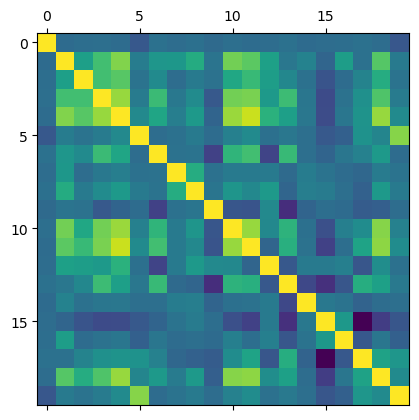

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

C:\Users\shyro\AppData\Local\Temp\ipykernel_11708\2764512698.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

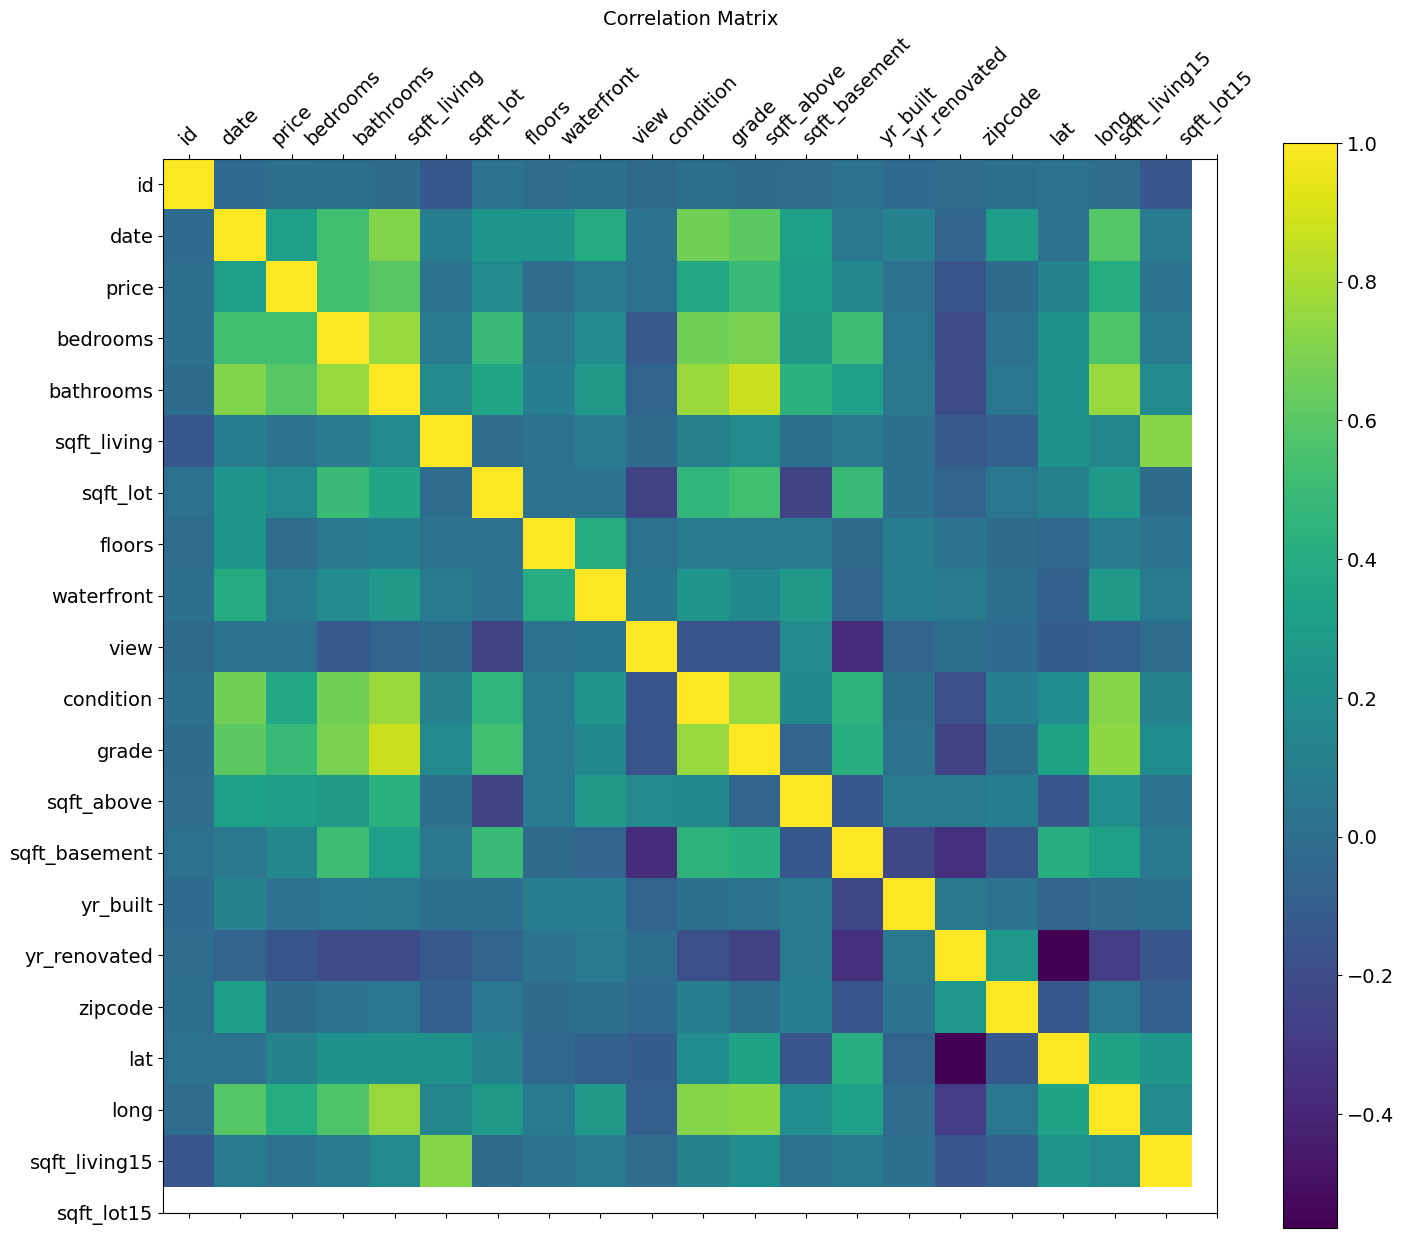

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(17,14)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
# Create a subset excluding the "id" and "Date" columns

sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [19]:
sub

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21594  360000.0         3       2.50         1530      1131     3.0   
21595  400000.0         4       2.50         2310      5813     2.0   
21596  402101.0         2       0.75         1020      1350     2.0   
21597  400000.0         3       2.50         1600      2388     2.0   
21598  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21594           0     0          3      8        1530              0   
21595           0     0          3      8        2310              0   
21596           0     0          3      7        1020              0   
21597           0     0          3      8        1600              0   
21598           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21594      2009             0    98103  47.6993 -122.346           1530   
21595      2014             0    98146  47.5107 -122.362           1830   
21596      2009             0    98144  47.5944 -122.299           1020   
21597      2004             0    98027  47.5345 -122.069           1410   
21598      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21594        1509  
21595        7200  
21596        2007  
21597        1287  
21598        1357  

[21599 rows x 19 columns]

Text(0.5, 1.0, 'Data Correlation')

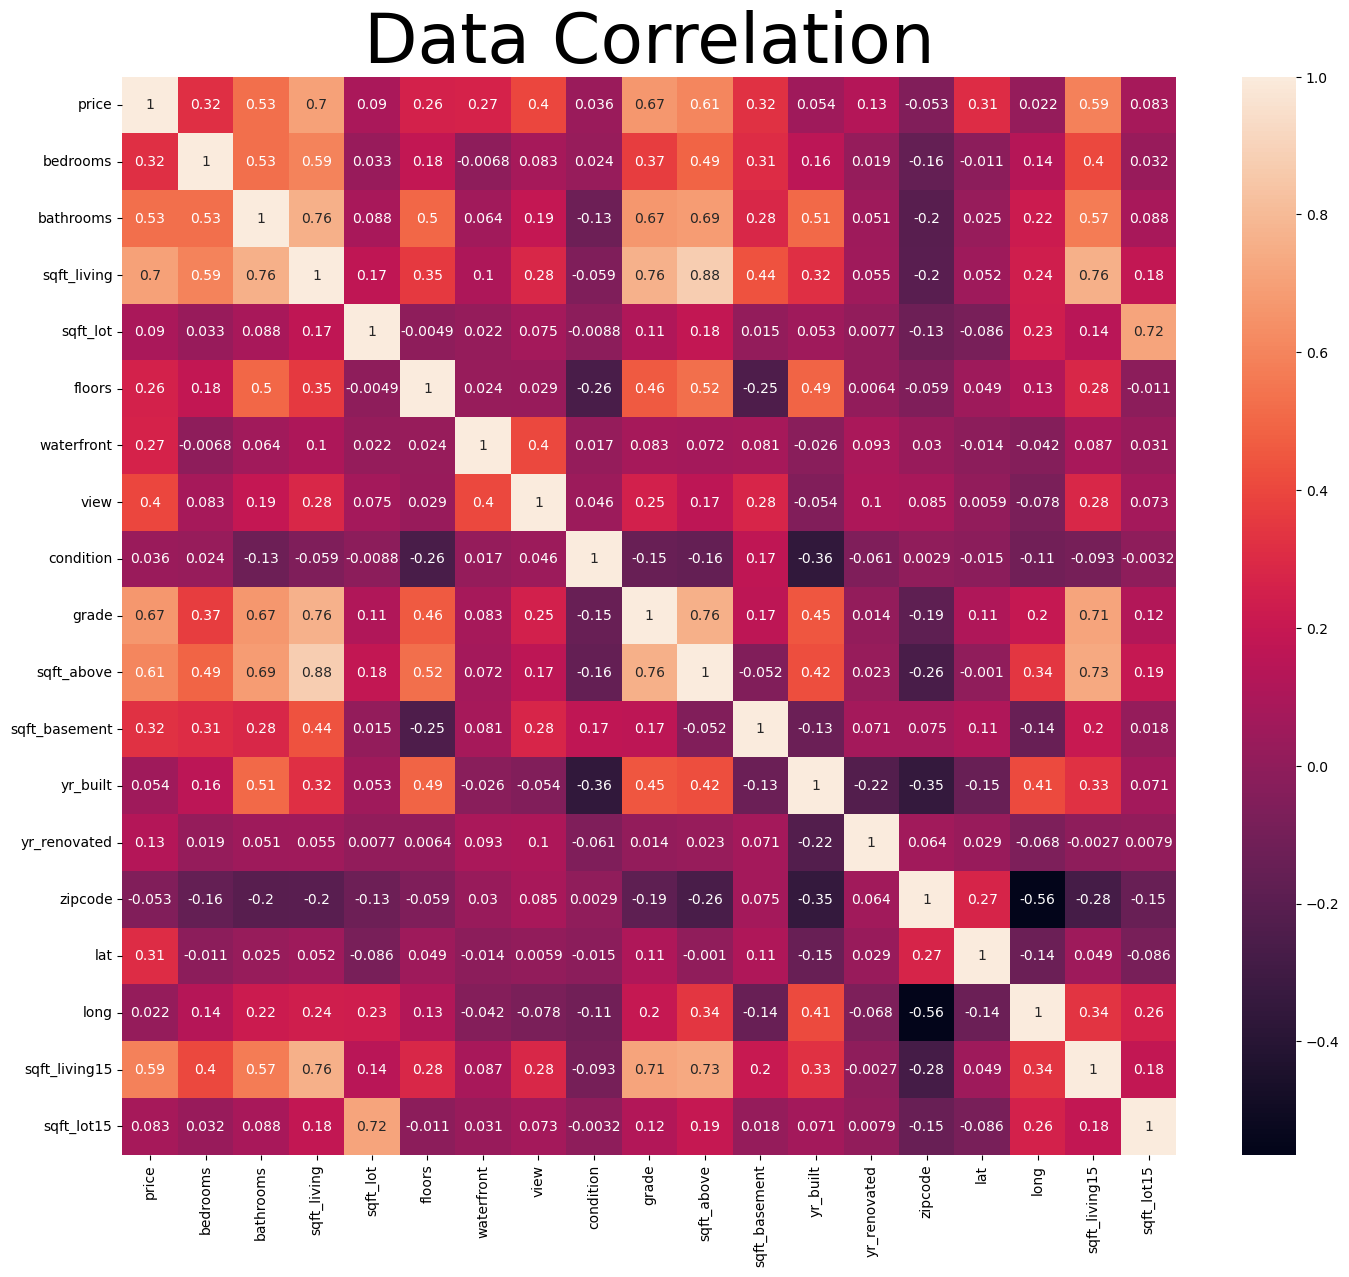

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(17,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.title ("Data Correlation", fontsize=50)

- Price is the dependent variable
- number of bathrooms, sqft_living, grade, sqft_above, sqft_living15 all have strong positive correlation to home prices

### Scatterplots:

Text(0.5, 1.0, 'Price vs Number of Bathrooms')

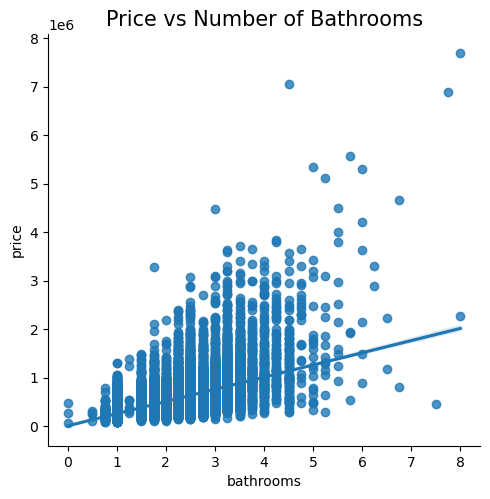

In [21]:
# Create a scatterplot for the "bathrooms" and "price" columns in seaborn

scatter_bathroom_price = sns.lmplot(x = 'bathrooms', y = 'price', data = df)
plt.title("Price vs Number of Bathrooms", fontsize=15)

Text(0.5, 1.0, 'Price vs Living Space')

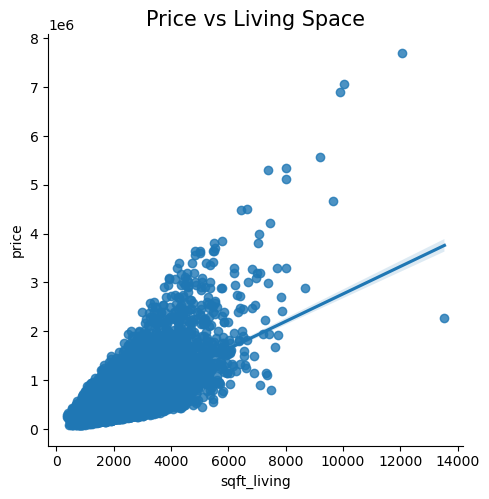

In [22]:
# Create a scatterplot for the "sqft_living" and "price" columns in seaborn

scatter_sqft_living_price = sns.lmplot(x = 'sqft_living', y = 'price', data = df)
plt.title("Price vs Living Space", fontsize=15)

Text(0.5, 1.0, 'Price vs Living Space of 15 Closest Homes')

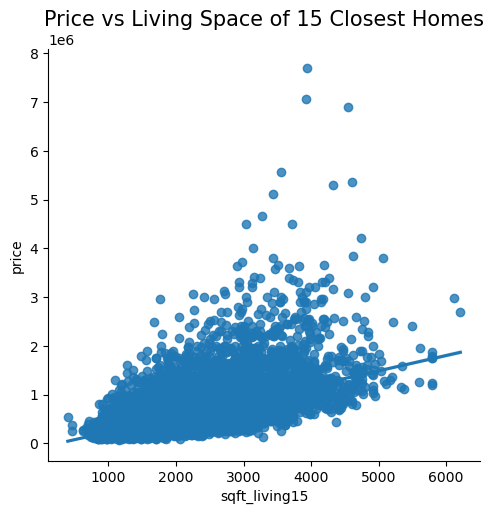

In [23]:
# Create a scatterplot for the "sqft_living15" and "price" columns in seaborn

scatter_sqft_living15_price = sns.lmplot(x = 'sqft_living15', y = 'price', data = df)
plt.title("Price vs Living Space of 15 Closest Homes", fontsize=15)

Text(0.5, 1.0, 'Price vs SqFt Excluding Basement')

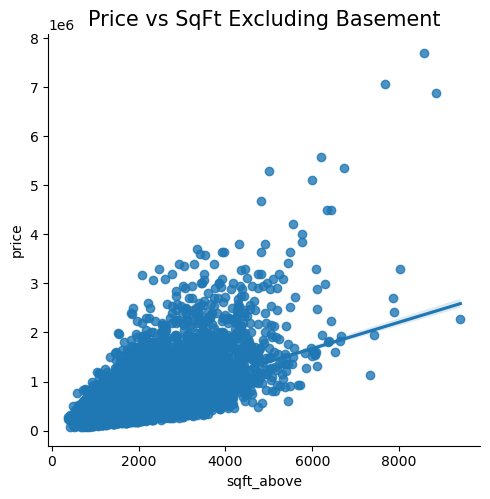

In [24]:
# Create a scatterplot for the "sqft_above" and "price" columns in seaborn

scatter_sqft_above_price = sns.lmplot(x = 'sqft_above', y = 'price', data = df)
plt.title("Price vs SqFt Excluding Basement", fontsize=15)

The trend lines are upwards which signify the positive correlation between these variables to home price. The scatterplot also shows the outliers in the data. 

### Pair Plots:

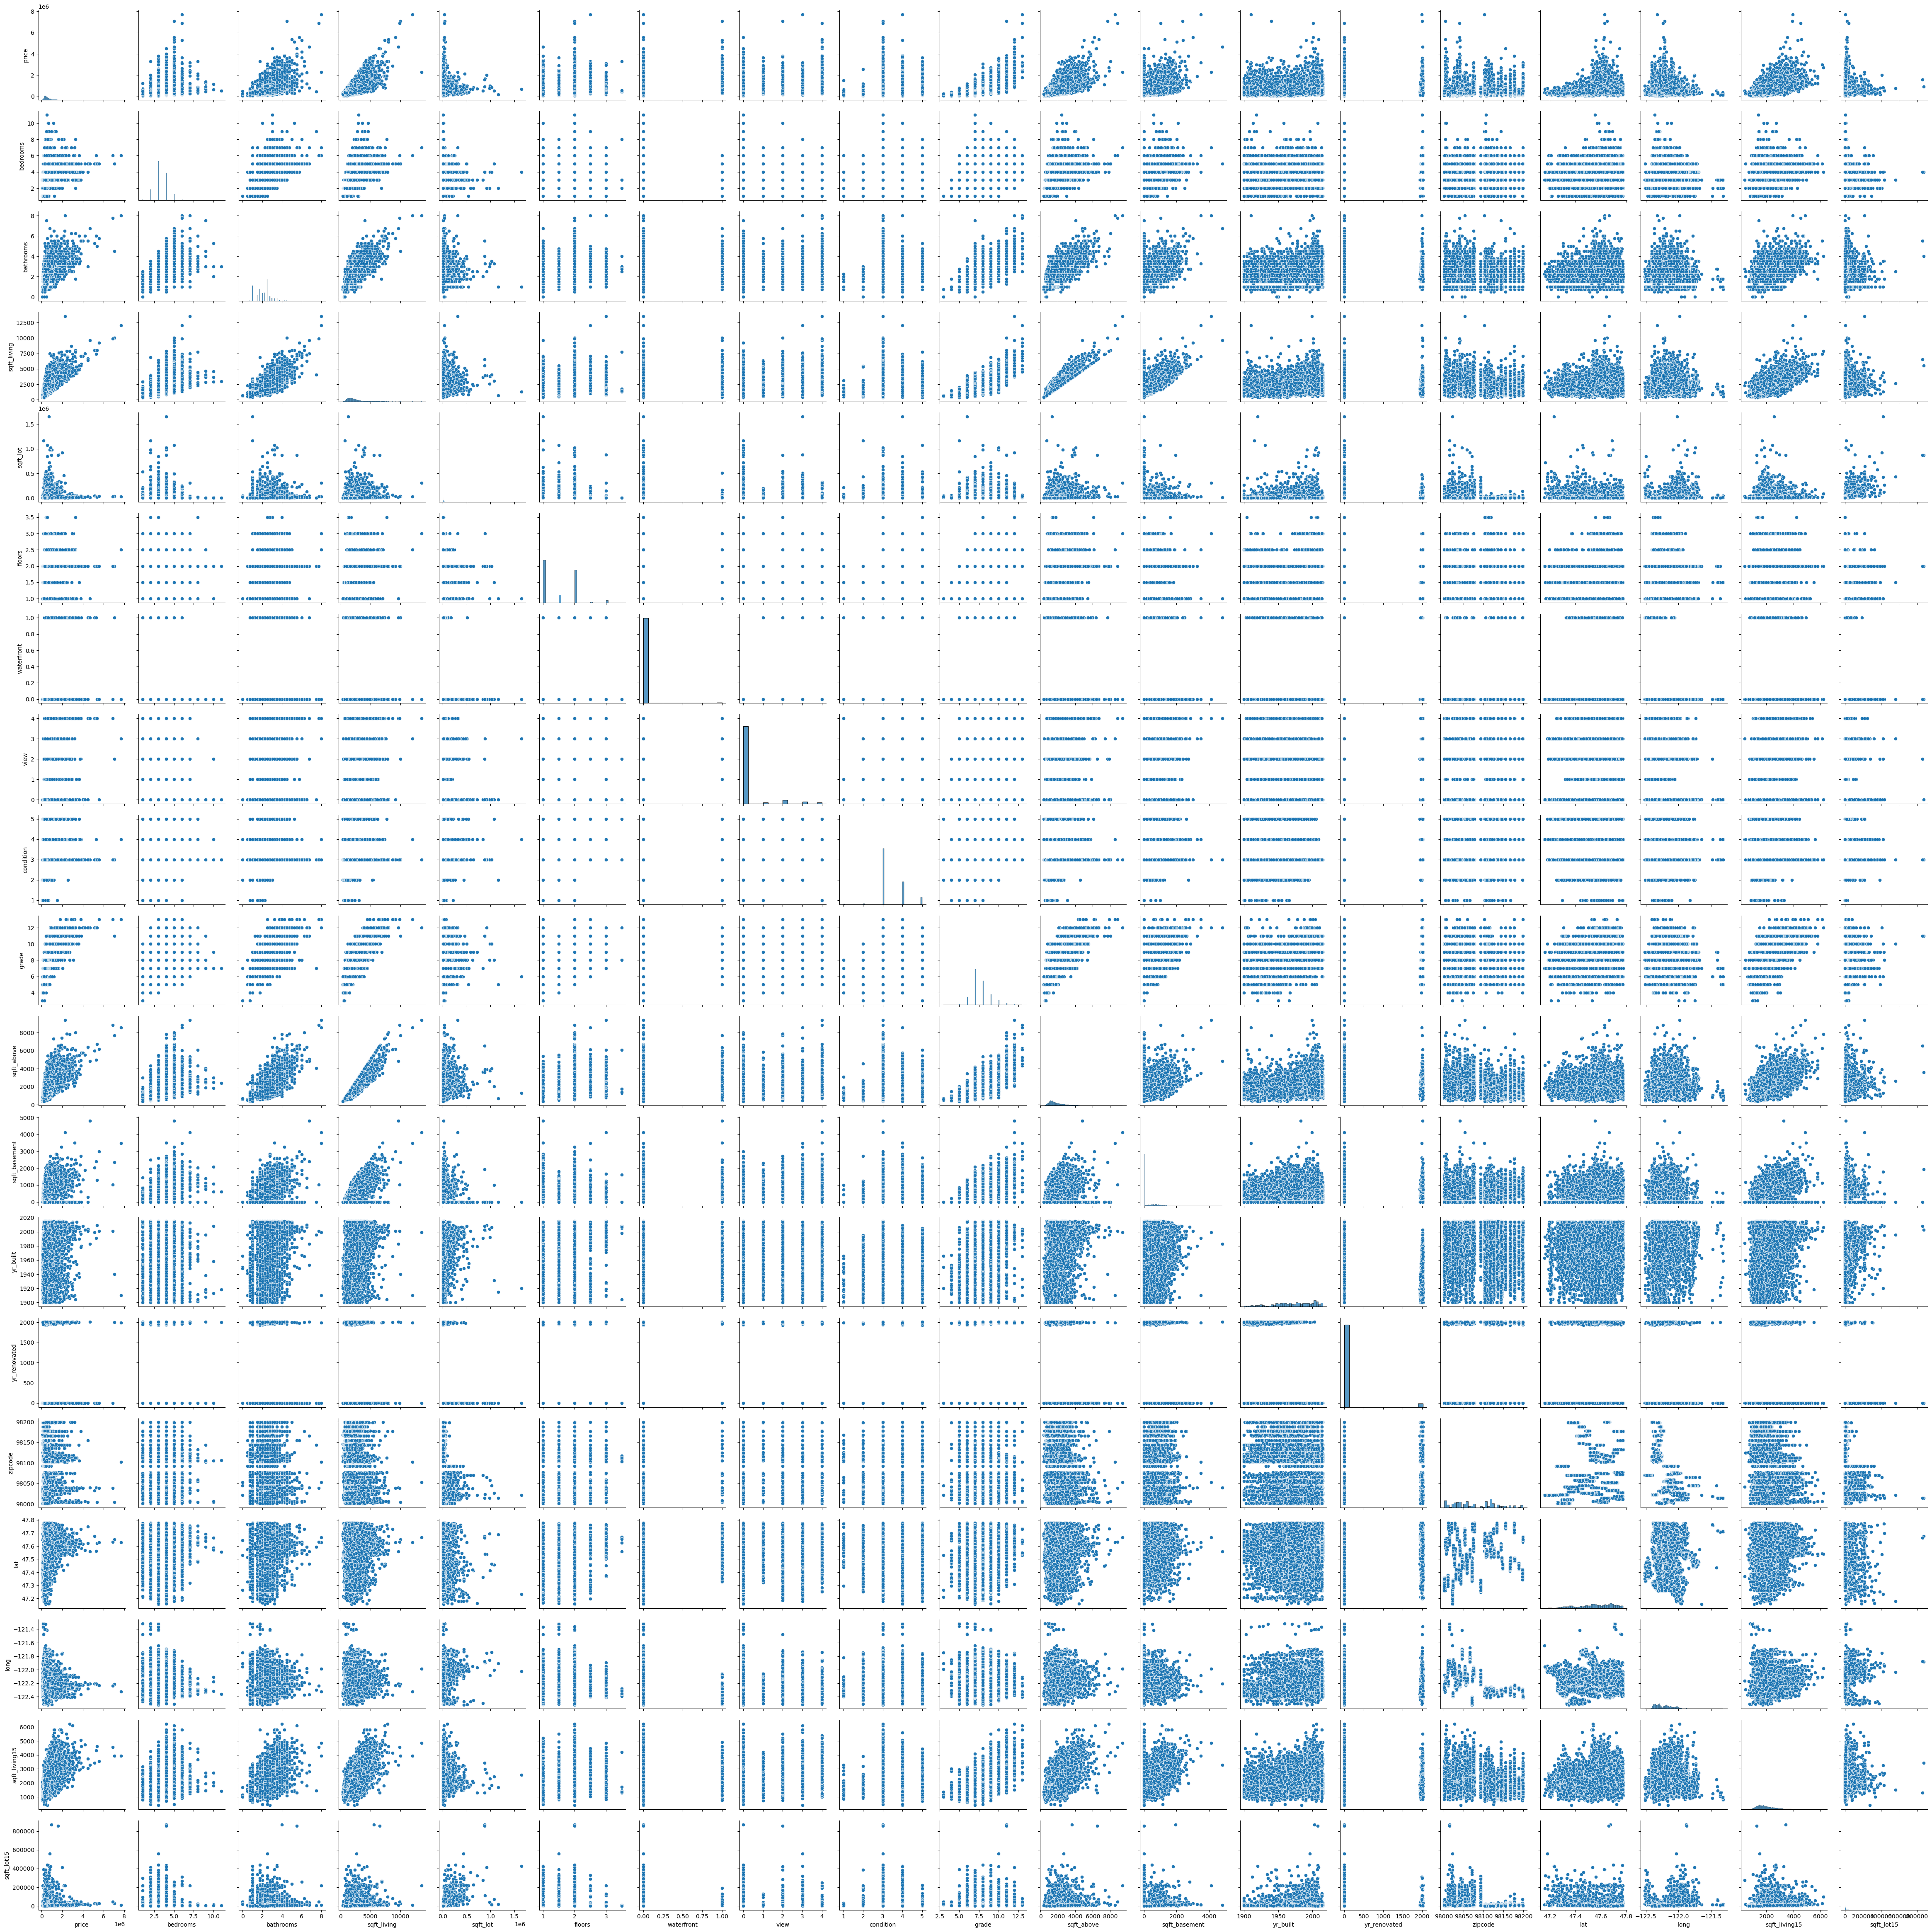

In [25]:
# Create a pair plot 

pair_1 = g = sns.pairplot(sub)

In [26]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['price', 'bedrooms', 'bathrooms', 'sqft_living']]

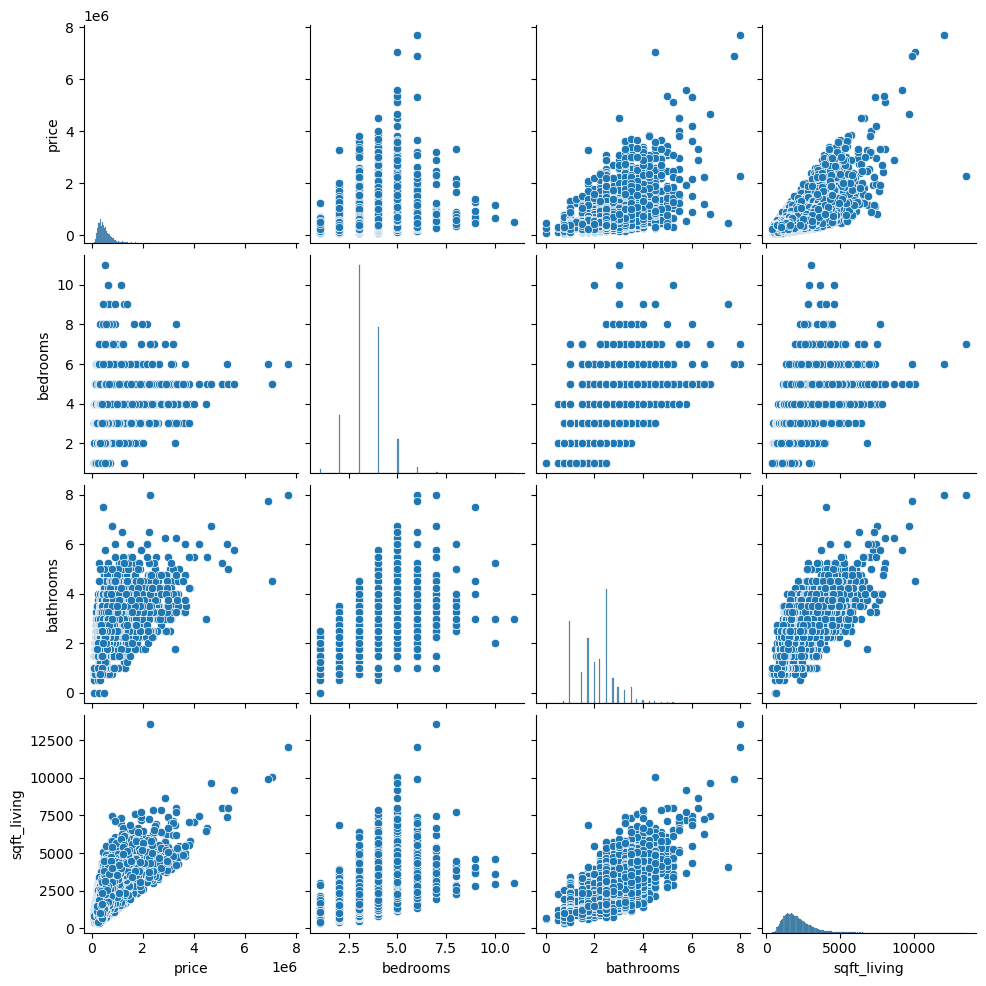

In [27]:
# Create a pair plot 

pair_2= g = sns.pairplot(sub_2)

In [28]:
# create new subset for second pair plot

sub_3 = sub[['sqft_lot', 'condition', 'grade','yr_built', 'sqft_living15']]

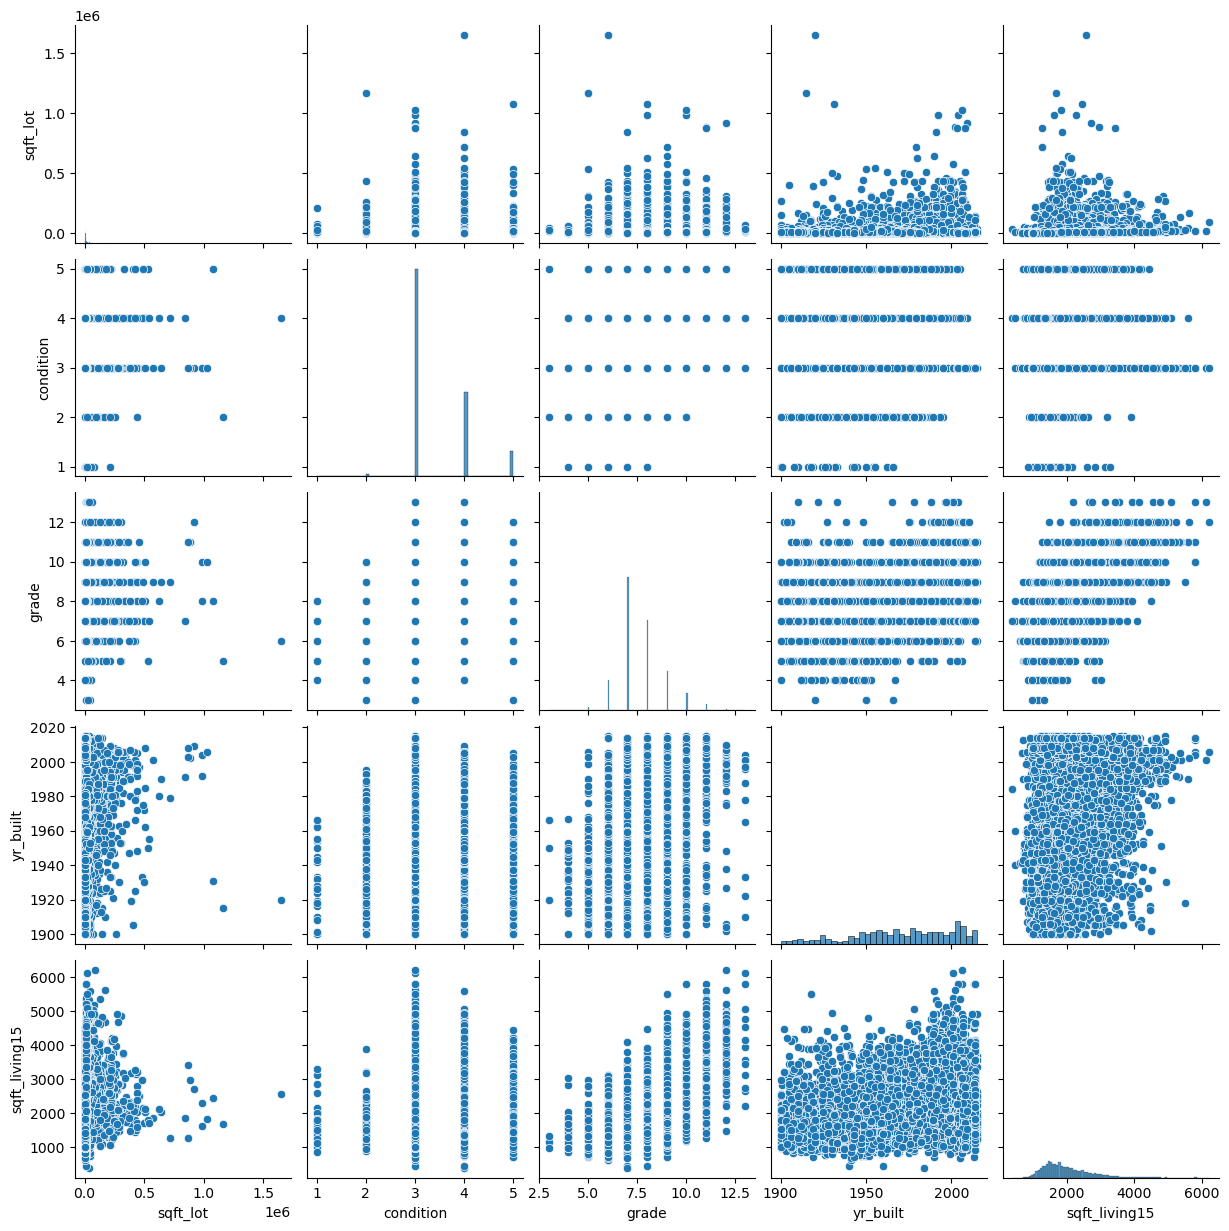

In [29]:
# Create second pair plot 

pair_3 = g = sns.pairplot(sub_3)

Sqft_living and yr_built show logical bins or thresholds. I'd like to investigate this further. 

### Categorical Plots:

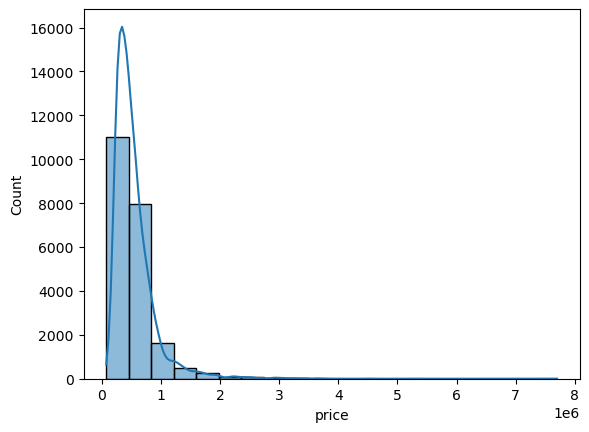

In [30]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

histplot = sns.histplot(df['price'], bins = 20, kde = True)

In [31]:
df.loc[df['price'] < 200000, 'Price category'] = 'Low tier'

In [32]:
df.loc[(df['price'] >= 200000) & (df['price'] < 500000), 'Price category'] = 'Middle tier'

In [33]:
df.loc[df['price'] >= 500000, 'Price category'] = 'High tier'

In [34]:
df['Price category'].value_counts(dropna = False)

Middle tier    11613
High tier       9202
Low tier         784
Name: Price category, dtype: int64

In [35]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Price category'],
      dtype='object')

Text(0.5, 1.0, 'Price vs Number of Bathrooms')

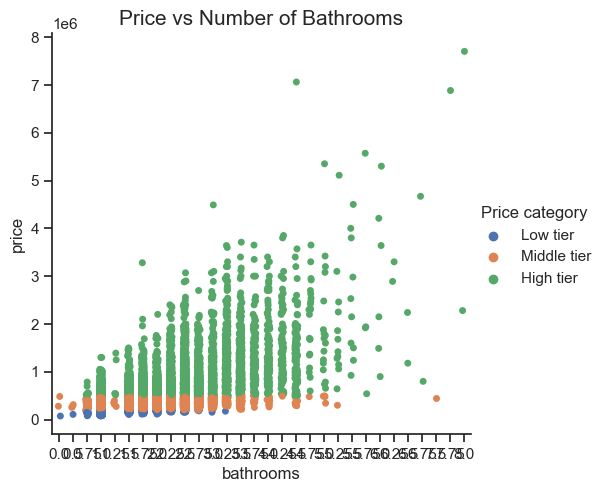

In [36]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
categorical_1 = sns.catplot(x="bathrooms", y="price", hue="Price category", data=df)
plt.title("Price vs Number of Bathrooms", fontsize=15)

Text(0.5, 1.0, 'Price vs Living Space')

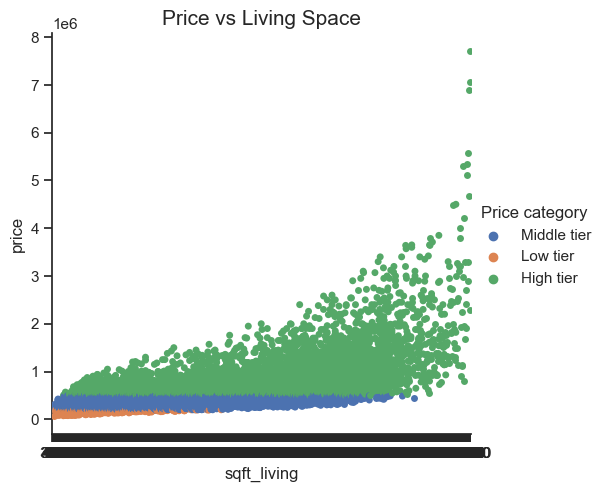

In [37]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
categorical_2 = sns.catplot(x="sqft_living", y="price", hue="Price category", data=df)
plt.title("Price vs Living Space", fontsize=15)

Text(0.5, 1.0, 'Price vs Year Built')

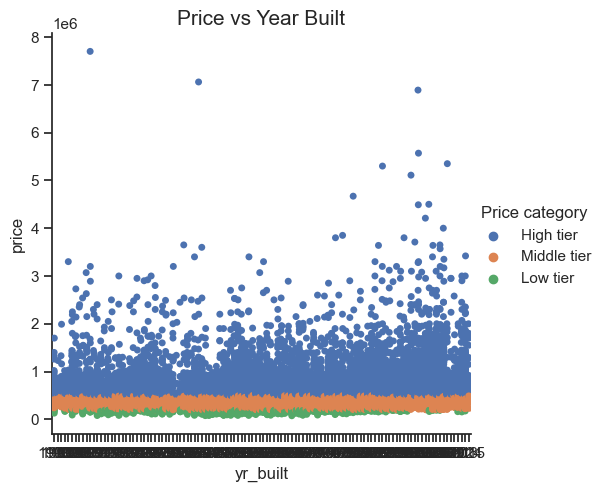

In [38]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
categorical_3 = sns.catplot(x="yr_built", y="price", hue="Price category", data=df)
plt.title("Price vs Year Built", fontsize=15)

Text(0.5, 1.0, 'Price vs SqFt Excluding Basement')

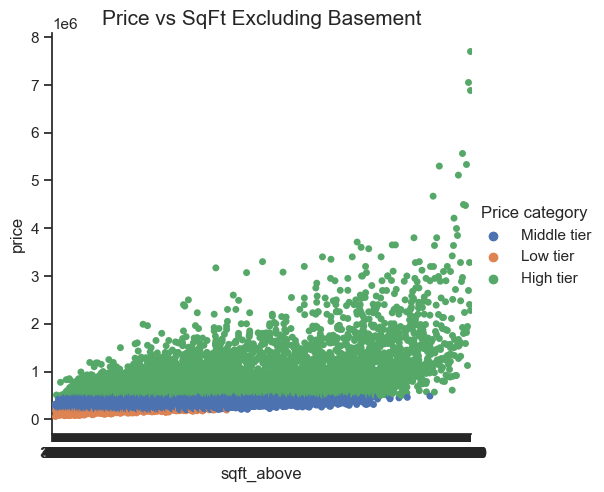

In [39]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
categorical_4 = sns.catplot(x="sqft_above", y="price", hue="Price category", data=df)
plt.title("Price vs SqFt Excluding Basement", fontsize=15)

number of bathrooms, stft_living, and sqft_above show a positive correlation to home prices. While year_built did not have any correlation to home prices. 

### Key questions:

#### 1. How are each characteristics of the home attributes to their sale values? Explain the correlations. 

Per the analysis done above, the features that attributes to higher selling prices are: number of bathrooms, sqft_living, grade, sqft_above and sqft_living15. Surprisingly, the number of bedrooms, sqft_lot, year built, and the condition of the homes have no correlation to the home prices. 

#### Additonal questions cannot be answered yet by this exercise.

### 4. Create New Variables

In [40]:
# Add variables to indicate if a house has a basement or not rather than just the size. 

df['has_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

   Price category  has_basement  
0     Middle tier             0  
1       High tier             1  
2        Low tier             0  
3       High tier             1  
4       High tier             0  

[5 rows x 23 columns]

In [41]:
# calculate distance to City center (Seattle, WA)

from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))

latitude_city = 47.610515
longitude_city = -122.33465413

df['distance_to_city'] = df.apply(lambda row: haversine(latitude_city, longitude_city, row['lat'], row['long']), axis=1)

df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21594   263000018  20140521T000000  360000.0         3       2.50   
21595  6600060120  20150223T000000  400000.0         4       2.50   
21596  1523300141  20140623T000000  402101.0         2       0.75   
21597   291310100  20150116T000000  400000.0         3       2.50   
21598  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  yr_built  \
0             1180      5650     1.0           0     0  ...      1955   
1             2570      7242     2.0           0     0  ...      1951   
2              770     10000     1.0           0     0  ...      1933   
3             1960      5000     1.0           0     0  ...      1965   
4             1680      8080     1.0           0     0  ...      1987   
...            ...       ...     ...         ...   ...  ...       ...   
21594         1530      1131     3.0           0     0  ...      2009   
21595         2310      5813     2.0           0     0  ...      2014   
21596         1020      1350     2.0           0     0  ...      2009   
21597         1600      2388     2.0           0     0  ...      2004   
21598         1020      1076     2.0           0     0  ...      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21594             0    98103  47.6993 -122.346           1530        1509   
21595             0    98146  47.5107 -122.362           1830        7200   
21596             0    98144  47.5944 -122.299           1020        2007   
21597             0    98027  47.5345 -122.069           1410        1287   
21598             0    98144  47.5941 -122.299           1020        1357   

       Price category  has_basement  distance_to_city  
0         Middle tier             0         10.458148  
1           High tier             1          6.796267  
2            Low tier             0         13.601613  
3           High tier             1          8.402784  
4           High tier             0         32.210221  
...               ...           ...               ...  
21594     Middle tier             0          5.429832  
21595     Middle tier             0          6.671843  
21596     Middle tier             0          4.078652  
21597     Middle tier             0         29.880839  
21598     Middle tier             0          4.082877  

[21599 rows x 24 columns]

Text(0.5, 1.0, 'Price vs House With or Without Basement')

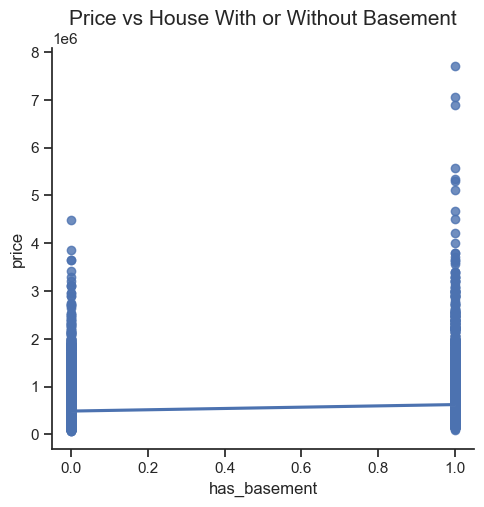

In [42]:
# Create a scatterplot for the "has_basement" and "price" columns in seaborn

scatter_bathroom_price = sns.lmplot(x = 'has_basement', y = 'price', data = df)
plt.title("Price vs House With or Without Basement", fontsize=15)

Homes with basements have a higher selling price

Text(0.5, 1.0, 'Price vs Distance to Seattle')

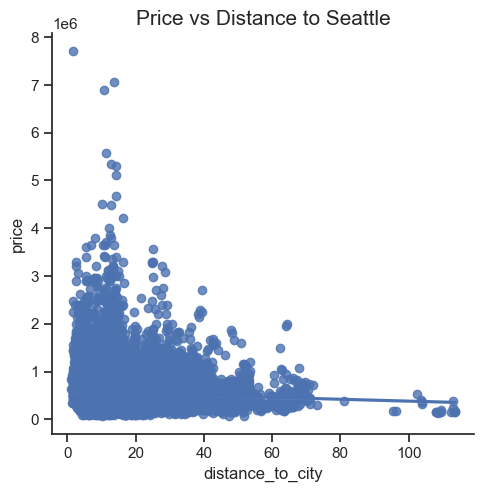

In [43]:
# Create a scatterplot for the "distance_to_city" and "price" columns in seaborn

scatter_bathroom_price = sns.lmplot(x = 'distance_to_city', y = 'price', data = df)
plt.title("Price vs Distance to Seattle", fontsize=15)

Homes closer to Seattle sell for more. 

In [44]:
# Keep only the variables you want to use in the pair plot

sub_3 = df[['has_basement', 'distance_to_city']]

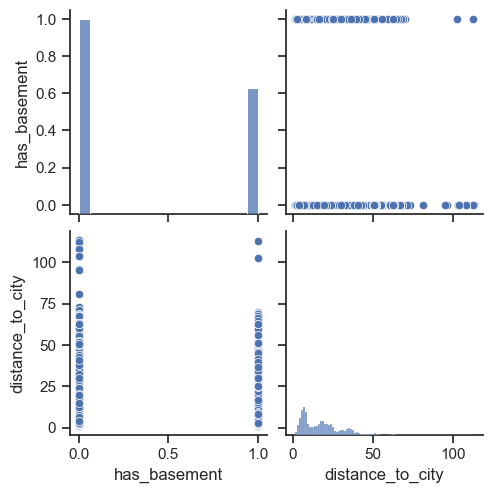

In [45]:
# Create a pair plot 

pair_3= g = sns.pairplot(sub_3)

Text(0.5, 1.0, 'Price vs House With or Without Basmement')

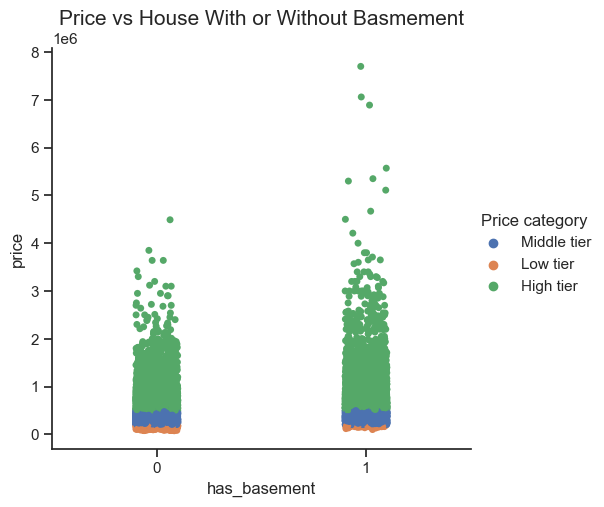

In [49]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
categorical_5 = sns.catplot(x="has_basement", y="price", hue="Price category", data=df)
plt.title("Price vs House With or Without Basmement", fontsize=15)

### Saving Charts

In [50]:
corr.figure.savefig(os.path.join(path,'04 Analysis','correlation_heatmap.png'))

In [51]:
scatter_bathroom_price.figure.savefig(os.path.join(path,'04 Analysis','scatter_bathroom_price.png'))

In [52]:
scatter_sqft_living_price.figure.savefig(os.path.join(path,'04 Analysis','scatter_sqft_living_price.png'))

In [53]:
scatter_sqft_living15_price.figure.savefig(os.path.join(path,'04 Analysis','scatter_sqft_living15_price.png'))

In [54]:
scatter_sqft_above_price.figure.savefig(os.path.join(path,'04 Analysis','scatter_sqft_above_price.png'))

In [55]:
pair_1.figure.savefig(os.path.join(path,'04 Analysis','pair_all.png'))

In [56]:
pair_2.figure.savefig(os.path.join(path,'04 Analysis','pair_2.png'))

In [57]:
pair_3.figure.savefig(os.path.join(path,'04 Analysis','pair_3.png'))

In [58]:
categorical_1.figure.savefig(os.path.join(path,'04 Analysis','bathroom_price_categorical.png'))

In [59]:
categorical_2.figure.savefig(os.path.join(path,'04 Analysis','sqft_living_price_categorical.png'))

In [60]:
categorical_3.figure.savefig(os.path.join(path,'04 Analysis','yr_built_price_categorical.png'))

In [61]:
categorical_4.figure.savefig(os.path.join(path,'04 Analysis','sqft_above_price_categorical.png'))

In [62]:
histplot.figure.savefig(os.path.join(path,'04 Analysis','histplot_categorical.png'))

#### Export CSV file

In [63]:
#export df to csv

df.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_new_var.csv'))